<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Report-Introduction" data-toc-modified-id="Report-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Report Introduction</a></span></li><li><span><a href="#Data-Background" data-toc-modified-id="Data-Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Background</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#GPU-Dataset" data-toc-modified-id="GPU-Dataset-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>GPU Dataset</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploration-and-Analysis" data-toc-modified-id="Data-Exploration-and-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration and Analysis</a></span><ul class="toc-item"><li><span><a href="#Graphical-Summaries" data-toc-modified-id="Graphical-Summaries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Graphical Summaries</a></span><ul class="toc-item"><li><span><a href="#Frequencies" data-toc-modified-id="Frequencies-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Frequencies</a></span><ul class="toc-item"><li><span><a href="#Event-Names-During-the-Terapixel-Rendering-Process" data-toc-modified-id="Event-Names-During-the-Terapixel-Rendering-Process-4.1.1.1"><span class="toc-item-num">4.1.1.1&nbsp;&nbsp;</span>Event Names During the Terapixel Rendering Process</a></span></li></ul></li><li><span><a href="#Location-and-Spread" data-toc-modified-id="Location-and-Spread-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Location and Spread</a></span><ul class="toc-item"><li><span><a href="#GPU-Statistics" data-toc-modified-id="GPU-Statistics-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>GPU Statistics</a></span></li><li><span><a href="#GPU-Statistics-by-Event-Name" data-toc-modified-id="GPU-Statistics-by-Event-Name-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span>GPU Statistics by Event Name</a></span></li><li><span><a href="#Rendering" data-toc-modified-id="Rendering-4.1.2.3"><span class="toc-item-num">4.1.2.3&nbsp;&nbsp;</span>Rendering</a></span></li></ul></li></ul></li><li><span><a href="#Rendering-Performance-Analysis" data-toc-modified-id="Rendering-Performance-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Rendering Performance Analysis</a></span><ul class="toc-item"><li><span><a href="#Finding-Rendering-Times" data-toc-modified-id="Finding-Rendering-Times-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Finding Rendering Times</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions-and-Data-Quality" data-toc-modified-id="Conclusions-and-Data-Quality-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions and Data Quality</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

BASE_PROCESSED_DATA_DIR = '../data/processed'
"""
str: Base processed data directory
"""

PROCESSED_CSV_FILE = BASE_PROCESSED_DATA_DIR + '/processed.csv'
"""
str: processed.csv final dataset file location 
"""

gpu_events_df = pd.read_csv(PROCESSED_CSV_FILE, index_col=0)
"""
pandas.core.frame.DataFrame: final dataset
"""

gpu_stats_labels = ['Power','Temperature','GPU Util.','Memory Util.']
"""
list: list of titles used for gpu statistics labels
"""


TIMESTAMP_FORMAT = '%Y-%m-%d %H:%M:%S.%f'
"""
str: string used to format timestamp for datetime conversion
"""

# convert timestamps to correct format

def fix_no_ms(date_string):
    """ adds a .0 for seconds with no ms
    """
    if '.' not in date_string:
        date_string = date_string + '.0'
        
    return(date_string)
           
gpu_events_df['start_time'] = gpu_events_df['start_time'].apply(lambda x: (fix_no_ms(x)))

gpu_events_df['stop_time'] = gpu_events_df['stop_time'].apply(lambda x: (fix_no_ms(x)))

gpu_events_df['start_time'] = gpu_events_df['start_time'].apply(
    lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))

gpu_events_df['stop_time'] = gpu_events_df['stop_time'].apply(
    lambda x: (datetime.strptime(x, TIMESTAMP_FORMAT)))

## Report Introduction 

This report documents the Data Understanding stage of the CRISP DM cycle. The Data Understanding
stage involves the process of collecting insights about the data, which are used to help form hypothesis for
later analysis, and information to help with modelling. The process involves data descriptions, explorations and quality verification. In this project this would involve analysing the frequencies, spread, location and patterns of GPU performance through the the different terapixel rendering tasks.

## Data Background 

As stated in the Business Understanding and Data Preparation Stage reports, the provided dataset consists of results from running three jobs of a terapixel render of the city of Newcastle upon Tyne in three levels (4, 8, 12) of the render with 1024 GPU nodes over a cloud service. The data is recorded in a processed csv file for the GPU stats and event checkpoints recorded by the rendering application.

## Data Description 

The full description of the data is covered in the data preparation stage, but to sum up the following fields from the final dataset are formed after preprocessing: 

#### Fields

* start_time (textual): Timestamp for tuple in 'YYYY-MM-DD H:M:S.f' format for start of event
* stop_time (textual): Timestamp for tuple in 'YYYY-MM-DD H:M:S.f' format for end of event
* hostname (textual): Unique system ID assigned to the Machine GPU runs from by Microsoft Azure
* gpuUUID (textual): Unique GPU ID assigned to the Machine GPU runs from by Microsoft Azure
* powerDrawWatt (numerical): Average power draw of system (Watts) for event
* gpuTempC (numerical): The Average GPU temperature (Celsius) for event
* gpuUtilPerc (numerical): The average GPU utilisation % (0-100) for event
* gpuMemUtilPerc (numerical): The average GPU memory usage % (0-100) for event
* eventName (textual): Name of current event occurring in the rendering process. Possible values:
    - TotalRender: The whole task itself (started or ended) 
	- Render: Image tile being rendered 
    - Saving Config: Configuration overhead  
	- Tiling: Tile postprocessing
	- Uploading: Output uploading to Azure Blob Storage
* x (numerical): X coordinate of tile being rendered 
* y (numerical): Y coordinate of tile being rendered 
* level (numerical): Visualisation level (zoom) within the terapixel map (4, 8, 12)

In [47]:
gpu_events_df.head()

,hostname,eventName,x,y,level,stop_time,powerDrawWatt,gpuUtilPerc,gpuMemUtilPerc,gpuTempC,start_time
0,0d56a730076643d585f77e00d2d8521a00000Q,TotalRender,156,186,12,2018-11-08 08:27:54.895,96.807273,70.318182,37.863636,37.590909,2018-11-08 08:27:10.606
1,0d56a730076643d585f77e00d2d8521a00000Q,Render,156,186,12,2018-11-08 08:27:53.796,96.807273,70.318182,37.863636,37.590909,2018-11-08 08:27:10.608
2,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,Uploading,200,23,12,2018-11-08 08:27:11.893,42.440000,0.000000,0.000000,41.000000,2018-11-08 08:27:10.839
3,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,Tiling,200,23,12,2018-11-08 08:27:11.882,42.440000,0.000000,0.000000,41.000000,2018-11-08 08:27:10.846
4,b9a1fa7ae2f74eb68f25f607980f97d700000H,TotalRender,160,14,12,2018-11-08 08:27:56.265,91.566957,71.000000,39.913043,38.695652,2018-11-08 08:27:10.612


## Data Exploration and Analysis

This section concentrates on the process of exploring the data for patterns and interesting features using
Exploratory Data Analysis.

### Graphical Summaries 

#### Frequencies 

##### Event Times During the Terapixel Rendering Process

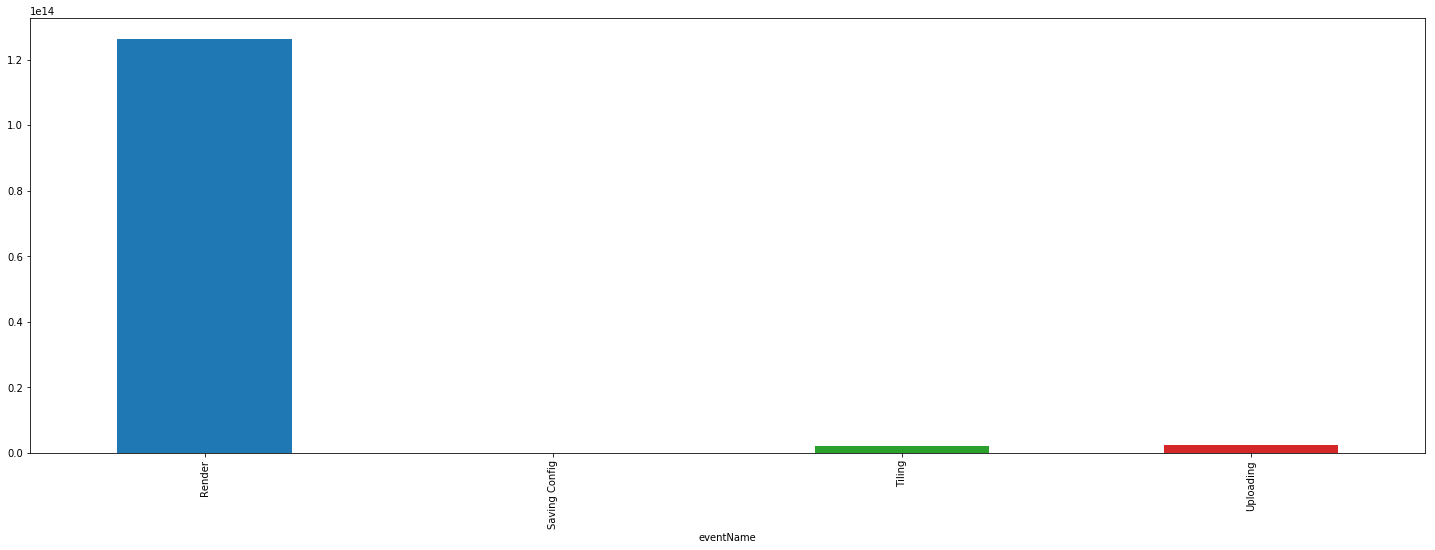

In [10]:
# group by event name (except total) to find execution times
event_deltas = gpu_events_df[gpu_events_df['eventName'] != 'TotalRender'].groupby(
    ['eventName']).apply(lambda x: x.stop_time - x.start_time)

# sum execution times
event_deltas.groupby(['eventName']).sum().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = [25, 8]

It seems that the GPUs overwhelmingly work on rendering most of their time judging by the number of render events in comparison to other events. Also, it can be noticed that the saving configuration event occurs in negligible execution time.

#### Location and Spread

##### GPU Statistics 


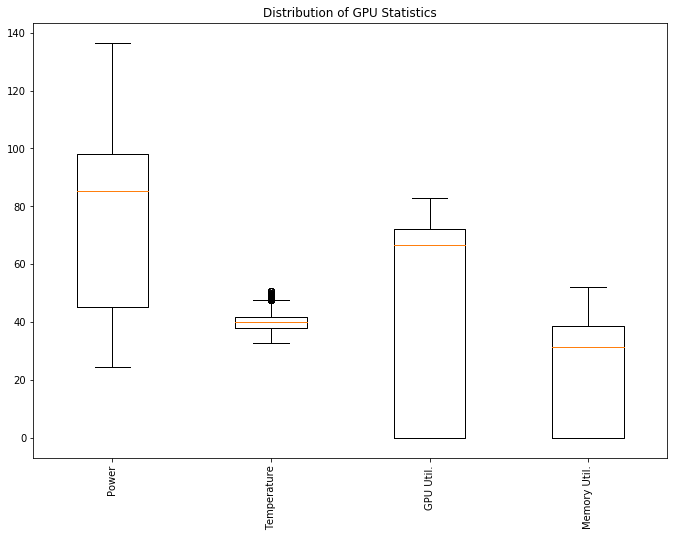

In [16]:
plt.subplot(1, 2, 1)
plt.boxplot([gpu_events_df['powerDrawWatt'], gpu_events_df['gpuTempC'], 
             gpu_events_df['gpuUtilPerc'], gpu_events_df['gpuMemUtilPerc']])
plt.xticks([1, 2, 3, 4], gpu_stats_labels, rotation='vertical')
plt.title('Distribution of GPU Statistics')
plt.rcParams['figure.figsize'] = [25, 8]

plt.show()

As can  be seen in the box plot, the GPU utilisation throughout the render runs seems to average right next to 90 with narrow ranges and with values in the lower scale mostly treated as outliers. This is a good indication, since it shows that the computation resources are well allocated. However, the memory utilisation averages seems much lower at around 50, moreover the Inter Quantile Range is tighter and the Q1 range is much higher, suggesting that memory utilisation is lower than the average more often. This suggests that the rendering task is either non-memory intensive, that the task is not well optimised enough to make use of video memory or that the graphic cards themselves have a lot more memory than needed. 

GPU temperature seems to be clustered tightly around 40, and the few values that get out of that tight Inter quantile range only reach just under 60 and over 25, and a significant proportion of these are considered outliers. This shows that the temperature management at the clusters is excellent as this is well beyond maximum operating temperatures of some cards like the Tesla P100 (“NVIDIA Tesla Product Literature,” n.d.), especially considering the high GPU Utilisation.

The power draw averages just under 100 and has a maximum of 200, considering the distance to the maximum power draw from the Q3 range, getting close to 200 seems quite unlikely. Overall, the power draw looks excellent as even its maximum is well below some modern top end graphic cards like the Tesla P100 (“NVIDIA Tesla Product Literature,” n.d.).

##### GPU Statistics by Event Name

##### Rendering

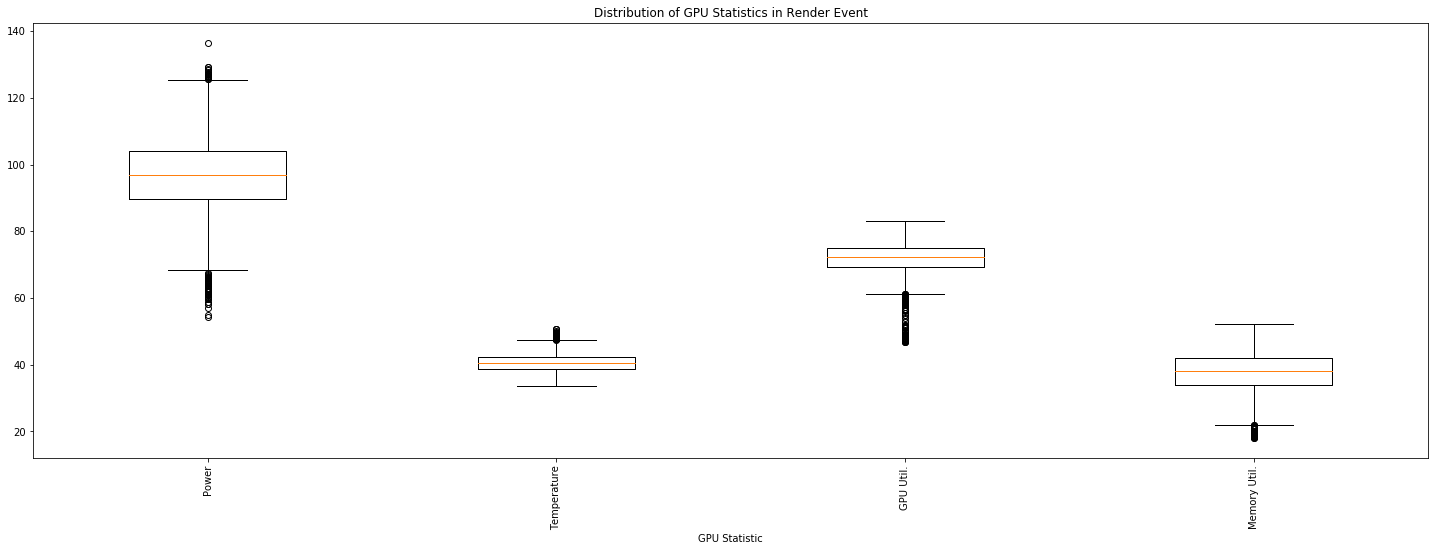

In [17]:
# group by statistic

plt.boxplot([gpu_events_df[gpu_events_df['eventName'] == 'Render']['powerDrawWatt'],
            gpu_events_df[gpu_events_df['eventName'] == 'Render']['gpuTempC'],
            gpu_events_df[gpu_events_df['eventName'] == 'Render']['gpuUtilPerc'],
            gpu_events_df[gpu_events_df['eventName'] == 'Render']['gpuMemUtilPerc']])
 
# setup labels and titles

plt.title('Distribution of GPU Statistics in Render Event')
plt.xlabel('GPU Statistic')
plt.xticks([1, 2, 3, 4], gpu_stats_labels, rotation='vertical')


# draw plot

plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

During rendering, the GPU statistics distributions are near identical to the overall distributions shown before - which is not surprisingly since rendering occupies most of the events. However, it can noticed that the distributions are generally tighter and have higher medians, in particular with GPU Utlisiation and Memory Utilisation. Power consumptions and temperature levels however are still not exceedingly high and below upper limits of typical GPUs, suggesting that they might not be a bottleneck. 

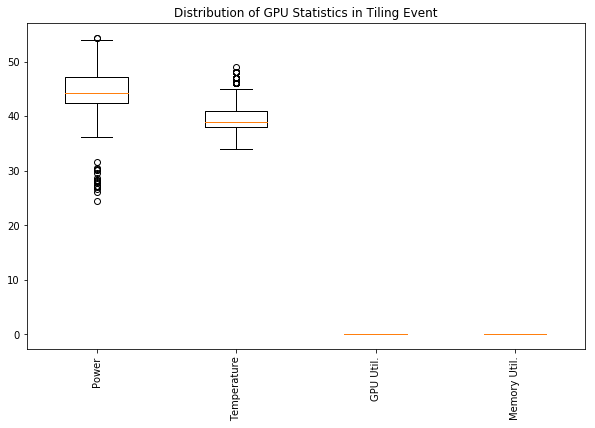

In [18]:
# group by statistic

plt.boxplot([gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['powerDrawWatt'],
            gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['gpuTempC'],
            gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['gpuUtilPerc'],
            gpu_events_df[gpu_events_df['eventName'] == 'Tiling']['gpuMemUtilPerc']])
 
# setup labels and titles

plt.title('Distribution of GPU Statistics in Tiling Event')
plt.xticks([1, 2, 3, 4], gpu_stats_labels, rotation='vertical')


# draw plot

plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

GPU and memory utilisation during the tiling events seems to be practically zero. Temperatures are lower and power consumption levels are significantly lower. This suggests that the GPUs are idling during the tiling event, hence it won't be an important event when it comes to bottleneck analysis.

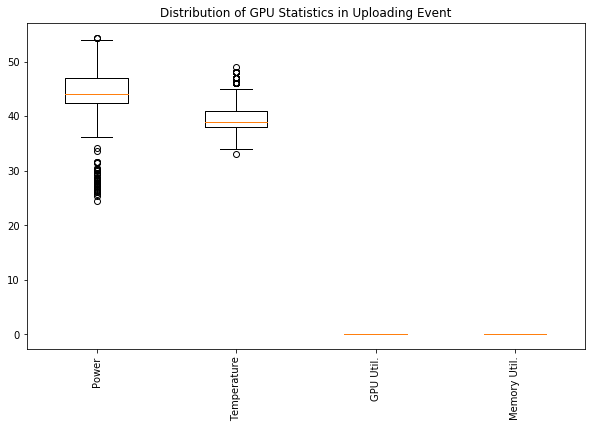

In [19]:
# group by statistic

plt.boxplot([gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['powerDrawWatt'],
            gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['gpuTempC'],
            gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['gpuUtilPerc'],
            gpu_events_df[gpu_events_df['eventName'] == 'Uploading']['gpuMemUtilPerc']])
 
# setup labels and titles

plt.title('Distribution of GPU Statistics in Uploading Event')
plt.xticks([1, 2, 3, 4], gpu_stats_labels, rotation='vertical')


# draw plot

plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

The plot here seems nearly identical to the plot with the tiling event, as the GPU looks to be idling according to the low power consumption, low temperatures and near complete lack of utilisation. Hence, like the tiling event, the uploading event will not be crucial during the bottleneck analysis.

### Rendering Performance Analysis 

As previously stated, the saving configuration events are near negligible due to their rare occurrences. Moreover, the tiling and uploading events do not seem to make use of the GPUs as they seem to be idling during these events. Hence, rendering events need to be analysed for bottlenecks.

#### Finding Rendering Times

To analyse the rendering performance, rendering times can be used as an indication. To find rendering times

In [11]:
len(gpu_events_df['gpuUUID'].unique())


1024

In [12]:
gpu_events_df[gpu_events_df['eventName'] == 'Render'].groupby('hostname').head()

,timestamp,hostname,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,eventName,x,y,level
1,2018-11-08 08:27:11.089000,0d56a730076643d585f77e00d2d8521a00000Q,GPU-d84a1024-9381-c725-3b85-dd7143e64c35,27.18,35,0,0,Render,156,186,12
5,2018-11-08 08:27:10.760000,b9a1fa7ae2f74eb68f25f607980f97d700000H,GPU-38bbf3b6-80fb-7e6f-6678-ee45035507ab,42.21,37,0,0,Render,160,14,12
7,2018-11-08 08:27:13.634000,265232c5f6814768aeefa66a7bec6ff600000I,GPU-71bbd441-8ae1-77f6-4fdd-5d3d9e97a0ea,41.94,36,0,0,Render,247,27,12
9,2018-11-08 08:27:11.606000,265232c5f6814768aeefa66a7bec6ff6000003,GPU-c8677356-387b-ba0e-831c-6924c7891eff,26.31,40,0,0,Render,112,168,12
11,2018-11-08 08:27:12.006000,e7adc42d28814e518e9601ac2329c51300000J,GPU-8590c2db-e116-8bd7-2381-7ff274944f06,40.66,37,0,0,Render,156,216,12
13,2018-11-08 08:27:14.543000,e7adc42d28814e518e9601ac2329c513000002,GPU-1411a2a6-482d-df84-6fca-1d4c4a4fdbdb,27.64,37,0,0,Render,186,14,12
15,2018-11-08 08:27:14.691000,83ea61ac1ef54f27a3bf7bd0f41ecaa700000V,GPU-2c096331-f621-b391-73dd-ce85d986ac47,47.63,43,0,0,Render,94,156,12
17,2018-11-08 08:27:15.199000,35bd84d72aca403b8129a7d652cc2750000009,GPU-712b411f-8a36-da2a-81f7-53a28c6de67d,39.04,37,0,0,Render,186,179,12
19,2018-11-08 08:27:14.975000,95b4ae6d890e4c46986d91d7ac4bf08200000F,GPU-32034dcb-3b3c-895f-bad4-8aa17ebb9c1b,36.92,37,0,0,Render,4,186,12
21,2018-11-08 08:27:15.466000,265232c5f6814768aeefa66a7bec6ff600000C,GPU-068a1b58-2007-c4b8-981c-bcb4a8ada9aa,28.39,42,0,0,Render,171,87,12


## Conclusions and Data Quality 

## References

1. NVIDIA Tesla Product Literature [WWW Document], n.d. . NVIDIA. URL https://www.nvidia.com/en-us/data-center/tesla-product-literature/ (accessed 1.24.19).